
Epoch 1

Epoch 2

Epoch 3

Epoch 4

Epoch 5


IndexError: index 2 is out of bounds for axis 0 with size 2

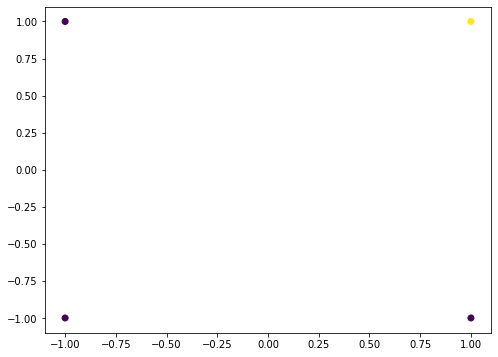

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi aktivasi
def aktivasi(x):
    return 1 if x > 0 else -1

# Definisi fungsi plot
def plot(w, train_data, train_target):
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, cmap='viridis')

    for i in range(w.shape[1]):
        slope = -w[0, i] / w[1, i]
        intercept = -w[2, i] / w[1, i]
        plt.plot(train_data[:, 0], slope * train_data[:, 0] + intercept, label=f'Neuron {i+1}')

    plt.legend()
    plt.title('Madaline Training')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Fungsi train yang telah Anda berikan (dengan komentar di dalamnya dihapus)
def train(train_data, train_target, alpha=0.1, max_epoch=10, verbose=True, draw=True):
    num_inputs = train_data.shape[1]
    num_outputs = train_target.shape[1]
    w = np.random.rand(num_inputs, num_outputs)
    b = np.random.random(num_outputs)
    b = np.append(b, 0.5)
    epoch = 0
    v_aktivasi = np.vectorize(aktivasi)
    weight_update = True

    while weight_update == True and epoch < max_epoch:
        weight_update = False

        for data, target in zip(train_data, train_target):
            z_in = np.dot(data, w)
            z_in = z_in + b[:-1]
            z = v_aktivasi(z_in)
            y_in = np.dot(z, target) + b[-1]
            y = v_aktivasi(y_in)

            if not np.array_equal(y, target):
                weight_update = True
                delta_w = alpha * np.outer(data, target - y)
                w += delta_w
                delta_b = alpha * (target - y)
                b[-1] += delta_b

        epoch = epoch + 1

        if verbose:
            print('\nEpoch', epoch)

        if draw and epoch % 5 == 0:  # Plotting setiap 5 epoch
            plot(w, train_data, train_target)

    return w, b

# Contoh data pelatihan
data = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
target = np.array([[1], [-1], [-1], [-1]])

# Memanggil fungsi train
(w, b) = train(data, target, alpha=0.8, max_epoch=20)
